In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
df = pd.read_csv(r'C:\Users\SilentCat\Downloads\淘宝用户行为.csv')


In [15]:
df.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21


In [16]:
print(df.describe())

            user_id       item_id  behavior_type  item_category
count  1.048575e+06  1.048575e+06   1.048575e+06   1.048575e+06
mean   7.188182e+07  2.023274e+08   1.105449e+00   6.843557e+03
std    4.139837e+07  1.167736e+08   4.572209e-01   3.809137e+03
min    4.913000e+03  6.680000e+02   1.000000e+00   8.000000e+00
25%    3.566983e+07  1.015051e+08   1.000000e+00   3.690000e+03
50%    7.319659e+07  2.019976e+08   1.000000e+00   6.194000e+03
75%    1.080497e+08  3.035514e+08   1.000000e+00   1.029000e+04
max    1.424559e+08  4.045617e+08   4.000000e+00   1.408000e+04


In [17]:
df.apply(lambda x:sum(x.isnull()/len(x))) #计算各个特征下缺失值的个数占总数的比例

user_id          0.000000
item_id          0.000000
behavior_type    0.000000
user_geohash     0.684534
item_category    0.000000
time             0.000000
dtype: float64

地理位置这个特征缺失值太多了，我们可以将此特征除去，

In [18]:
df.shape #查看矩阵的维度和维数

(1048575, 6)

发现数据集里面的样本数量很多，数据可能出现重复的情况，为此我们需要进行去重的操作

In [19]:
df.drop('user_geohash',axis=1,inplace=True)

In [20]:
df.head() #user_geohash这个特征已被去除

,user_id,item_id,behavior_type,item_category,time
0,98047837,232431562,1,4245,2014-12-06 02
1,97726136,383583590,1,5894,2014-12-09 20
2,98607707,64749712,1,2883,2014-12-18 11
3,98662432,320593836,1,6562,2014-12-06 10
4,98145908,290208520,1,13926,2014-12-16 21


我们可以看到还有一个问题就是time这个标签下的时间格式表示有点奇怪，我们不妨将时间分为日期和具体时间两个特征来处理

In [21]:
df['time'] = pd.to_datetime(df['time'],format="%Y-%m-%d")
df['hour'] = df.time.dt.hour#提取time的具体时间(小时)部分
df['time'] = df.time.dt.normalize() #提取time的日期部分

df.head()

,user_id,item_id,behavior_type,item_category,time,hour
0,98047837,232431562,1,4245,2014-12-06,2
1,97726136,383583590,1,5894,2014-12-09,20
2,98607707,64749712,1,2883,2014-12-18,11
3,98662432,320593836,1,6562,2014-12-06,10
4,98145908,290208520,1,13926,2014-12-16,21


对特征值进行重命名

In [22]:
df = df.rename(columns={'user_id':'用户名',
                       'item_id':'商品',
                        'behavior_type':'行为',
                        'item_category':'物品类型',
                        'time':'日期',
                        'hour':'小时'})

对用户的行为时间进行排序

In [23]:
df.sort_values(by='日期',ascending=True,inplace=True) #先对时间进行排序
df.reset_index(drop=True,inplace=True) #再对索引值进行重新编码

df.head()

,用户名,商品,行为,物品类型,日期,小时
0,91712885,74617195,1,3472,2014-11-18,21
1,75350465,269037962,1,2953,2014-11-18,22
2,109280382,372202404,1,11279,2014-11-18,22
3,75350465,255235242,1,4245,2014-11-18,15
4,121306092,295443537,1,2993,2014-11-18,15


下面进行流量分析

先是对日期维度进行分析

PV

Text(0.5, 1.0, '每天访问量PV')

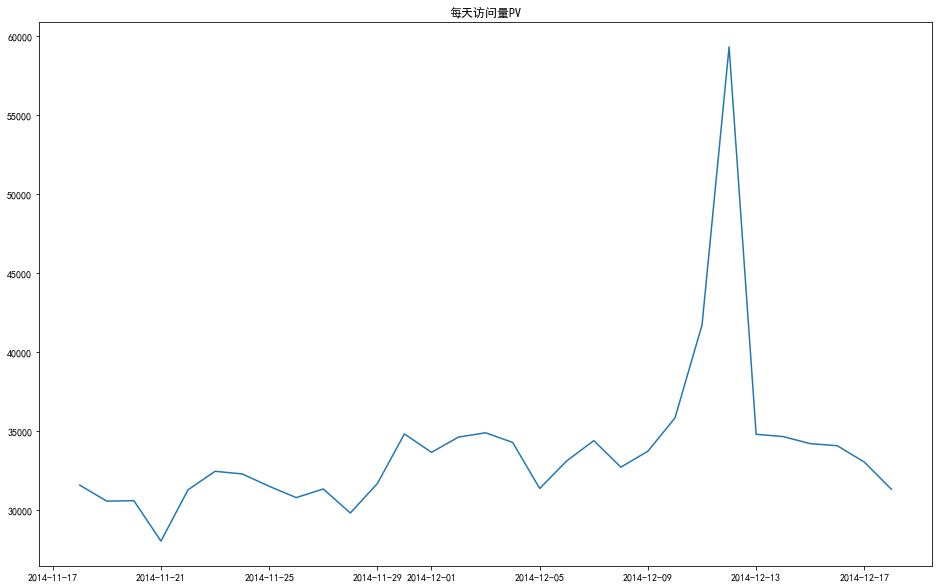

In [24]:
import matplotlib as mpl

mpl.rcParams["font.family"] = "SimHei" #解决matplotlib中无法显示中文标签的问题

PV_daily = df.groupby('日期').count()['用户名'].rename('PV')
plt.figure(figsize=(16,10))
plt.plot(PV_daily)
plt.title('每天访问量PV')

UV

Text(0.5, 1.0, '每天访问人数UV')

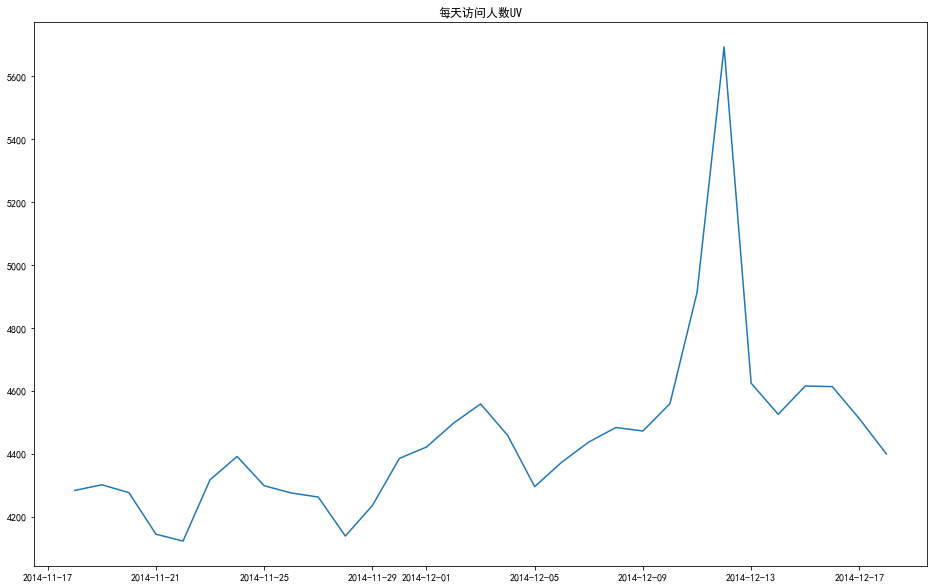

In [25]:
UV_daily = df.groupby('日期')['用户名'].nunique().rename('UV')
plt.figure(figsize=(16,10))
plt.plot(UV_daily)
plt.title('每天访问人数UV')

对于统计图不能反应直观的数据量

In [26]:
daily = pd.concat([PV_daily,UV_daily],axis=1)
daily.head()

,PV,UV
日期,,
2014-11-18,31581,4283
2014-11-19,30567,4301
2014-11-20,30598,4276
2014-11-21,28039,4144
2014-11-22,31283,4122


下面是具体时间进行分析

PV

In [27]:
PV_hour = df.groupby('小时').count()['用户名'].rename('PV')
UV_hour = df.groupby('小时')['用户名'].nunique().rename('UV')

hour = pd.concat([PV_hour,UV_hour],axis=1)                                                         
hour.head()               

,PV,UV
小时,,
0,44774,4067
1,23376,2519
2,12897,1651
3,8624,1234
4,6887,1098


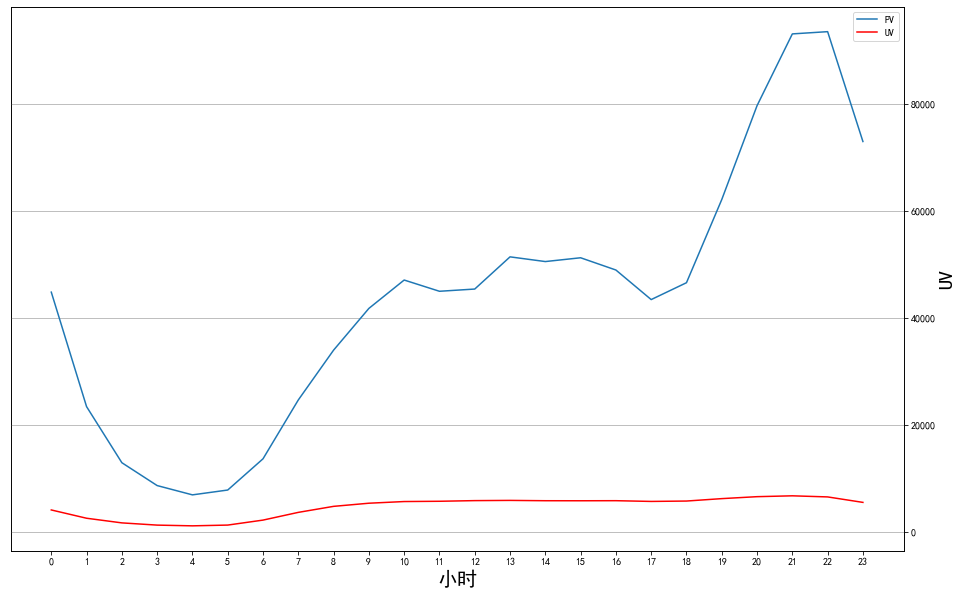

In [28]:
plt.figure(figsize=(16,10))
plt.xlabel(' ',fontsize=20)

hour['PV'].plot(label='PV',secondary_y=True)
plt.ylabel('PV',fontsize=20)

hour['UV'].plot(color='red',label='UV',secondary_y=True)
plt.ylabel('UV',fontsize=20)

plt.xticks((hour.index),range(0,24))

plt.legend(loc='best')
plt.grid(True)
plt.show()

# 用户行为分析

In [29]:
behavior_data = pd.pivot_table(df,index='日期',columns='行为',values='用户名',aggfunc=np.size)
behavior_data.columns = ["点击","收藏","加入购物车","支付"]
behavior_data.head()

,点击,收藏,加入购物车,支付
日期,,,,
2014-11-18,29802,599,866,314
2014-11-19,28723,642,880,322
2014-11-20,28798,630,877,293
2014-11-21,26403,616,778,242
2014-11-22,29538,592,854,299


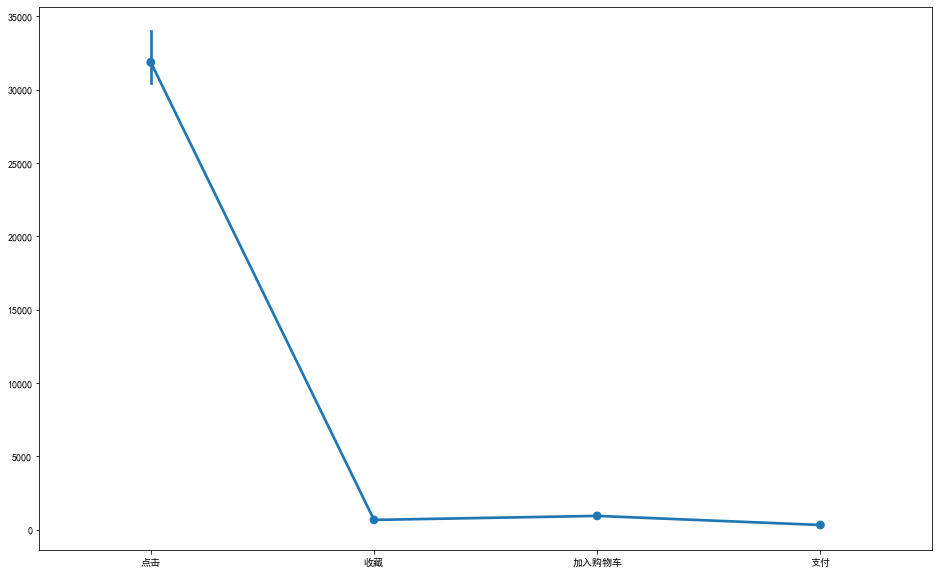

In [30]:
plt.figure(figsize=(16,10))
sns.pointplot(data=behavior_data[["点击","收藏","加入购物车","支付"]])
plt.show()

由于点击的次数远多于其他三种行为，所以在这里将收藏、加入购物车、支付三种作为对比

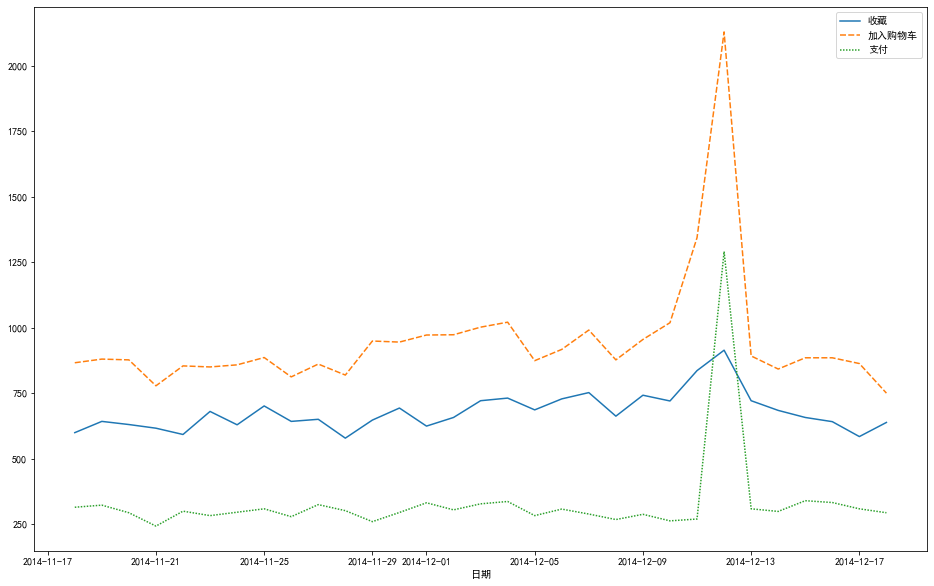

In [31]:
plt.figure(figsize=(16,10))
sns.lineplot(data=behavior_data[['收藏','加入购物车','支付']])
plt.show()

## 以小时来分析用户行为

In [32]:
behavior_data1 = pd.pivot_table(df,index='小时',columns='行为',values='用户名',aggfunc=np.size)
behavior_data1.columns = ["点击","收藏","加入购物车","支付"]
behavior_data1.head()

,点击,收藏,加入购物车,支付
小时,,,,
0,42145,954,1219,456
1,22120,540,550,166
2,12219,276,331,71
3,8200,163,220,41
4,6478,174,201,34


同样我们可以看到在小时下点击次数还是远多于其他的三种行为，同样我们将除点击次数外的行为做一个比较

<AxesSubplot:xlabel='小时'>

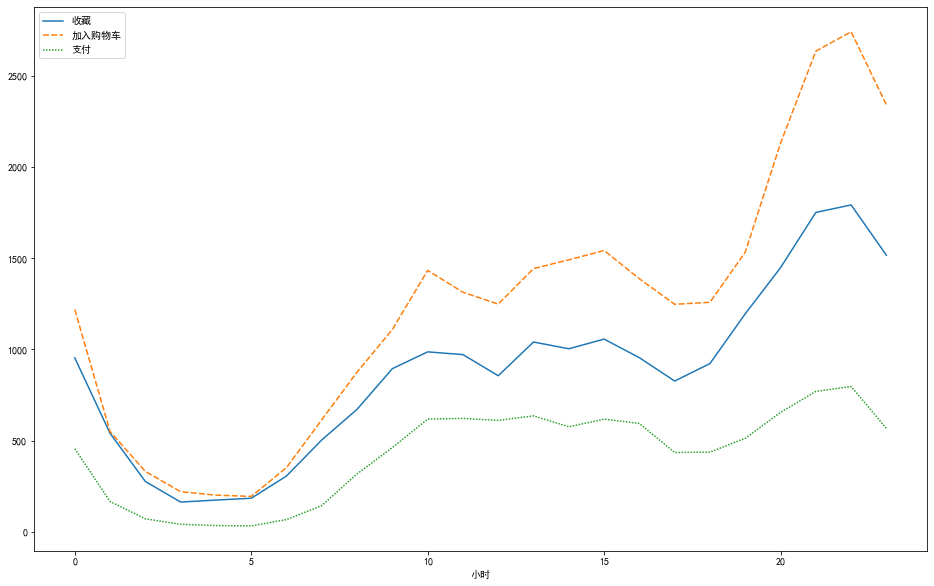

In [33]:
plt.figure(figsize=(16,10))
sns.lineplot(data=behavior_data1[["收藏","加入购物车","支付"]])

漏斗模型

In [34]:
database = df.groupby("行为").count()["用户名"]
print(database)

行为
1    987911
2     20997
3     29427
4     10240
Name: 用户名, dtype: int64


In [35]:
df_behavior = df.groupby("行为").count()["用户名"].reset_index().rename(columns={"用户名":"人数"})
df_behavior

,行为,人数
0,1,987911
1,2,20997
2,3,29427
3,4,10240


计算单一转化率

In [57]:
tnum = np.array(df_behavior["人数"])[:-1]
num = np.array(df_behavior["人数"])[1:]
print(tnum)
print(num)

conversion_rate = num/tnum
print(conversion_rate)

[987911  20997  29427]
[20997 29427 10240]
[0.02125394 1.40148593 0.34797975]


In [59]:
conversion_rate = list(conversion_rate)

设置第一个(即点击率)为100%

In [60]:
conversion_rate.insert(0,1)
print(conversion_rate)
conversion_rate = [round(x*100,2)for x in conversion_rate]
df_behavior["单一转化率"] = conversion_rate
df_behavior

[1, 0.021253938866962713, 1.4014859265609372, 0.3479797464913175]


,行为,人数,单一转化率,总体转化率
0,1,987911,100.00,100.00
1,2,20997,2.13,2.13
2,3,29427,140.15,2.98
3,4,10240,34.80,1.04


总体转化率

In [39]:
total_conversion = df_behavior["人数"]/df_behavior["人数"][0]
total_conversion = [round(x*100,2)for x in total_conversion]
df_behavior["总体转化率"] = total_conversion
df_behavior

,行为,人数,单一转化率,总体转化率
0,1,987911,100.00,100.00
1,2,20997,2.13,2.13
2,3,29427,140.15,2.98
3,4,10240,34.80,1.04


In [40]:
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

In [41]:
from pyecharts import options as opts
from pyecharts.charts import Funnel

attr = ["浏览","加入购物车","收藏","购买"]
value = (np.array(df_behavior["总体转化率"])).tolist()
funnel = Funnel(init_opts=opts.InitOpts(width="1600px", height="800px"))
funnel.add("淘宝用户行为分析",[list(z) for z in zip(attr,value)])
funnel.set_global_opts(title_opts=opts.TitleOpts(title="淘宝用户行为分析"))
funnel.tooltip_opts=opts.TooltipOpts(formatter="{a} <br/>{b} : {c}%")
funnel.set_series_opts(label_opts=opts.LabelOpts(is_show=True, position="inside"))
funnel.itemstyle_opts=opts.ItemStyleOpts(border_color="#fff", border_width=1)
funnel.load_javascript()

In [42]:
funnel.render_notebook()

# 用户消费分析

消费次数维度

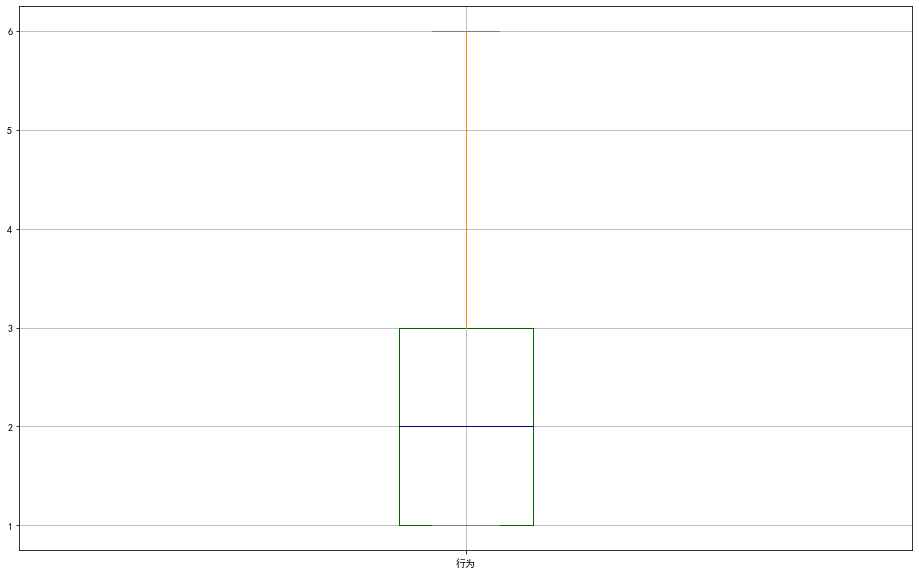

In [43]:
consumption = df[df.行为==4].groupby("用户名").count()["行为"]

plt.figure(figsize=(16,10))
color = dict(boxes = 'DarkGreen',whiskers = 'DarkOrange',medians = 'DarkBlue',caps='Gray')
consumption.plot.box(grid=True,showfliers=False,color=color)
plt.show()

日ARPPU分析

In [44]:
ARPPU_day = df[df['行为']==4].groupby(['日期','用户名'])["行为"].count().reset_index().rename(columns={'行为':'消费次数'})
ARPPU_day.head(10)

,日期,用户名,消费次数
0,2014-11-18,88930,1
1,2014-11-18,1498131,1
2,2014-11-18,2131753,1
3,2014-11-18,3671315,1
4,2014-11-18,3789630,1
5,2014-11-18,4120403,1
6,2014-11-18,4186010,1
7,2014-11-18,4225412,3
8,2014-11-18,4364079,1
9,2014-11-18,4688795,1


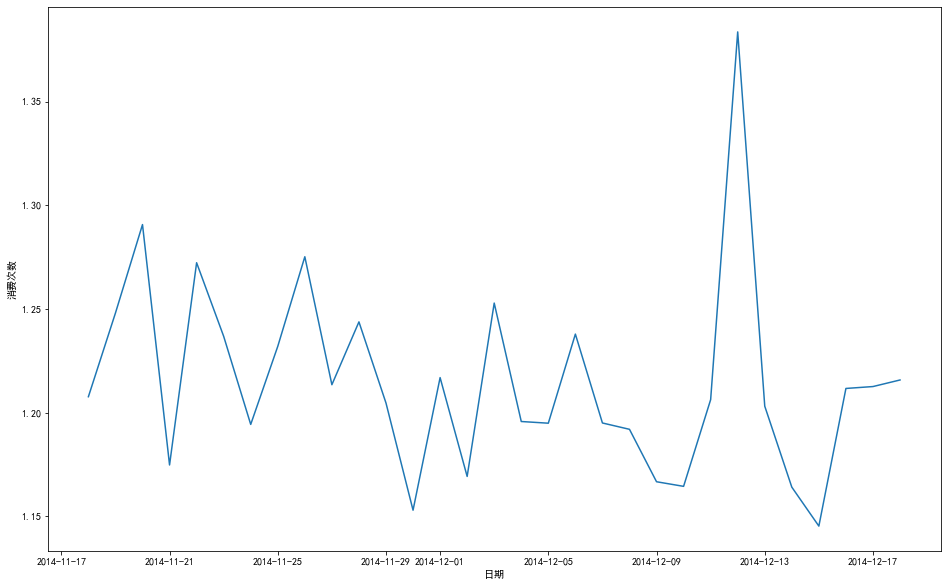

In [45]:
ARPPU_day = ARPPU_day.groupby('日期').sum()['消费次数']/ARPPU_day.groupby('日期').count()['消费次数']
plt.figure(figsize=(16,10))
sns.lineplot(data=ARPPU_day)
plt.show()

日ARPU情况分析

In [46]:
df['operation'] = 1
ARPU_day = df.groupby(['日期','用户名','行为'])['operation'].count().reset_index().rename(columns={'operation':'操作次数'}) 
ARPU_day.head(10)

,日期,用户名,行为,操作次数
0,2014-11-18,4913,1,6
1,2014-11-18,7591,1,1
2,2014-11-18,12645,1,1
3,2014-11-18,88930,1,6
4,2014-11-18,88930,2,1
5,2014-11-18,88930,4,1
6,2014-11-18,90472,1,1
7,2014-11-18,104155,1,2
8,2014-11-18,113251,1,7
9,2014-11-18,113960,1,5


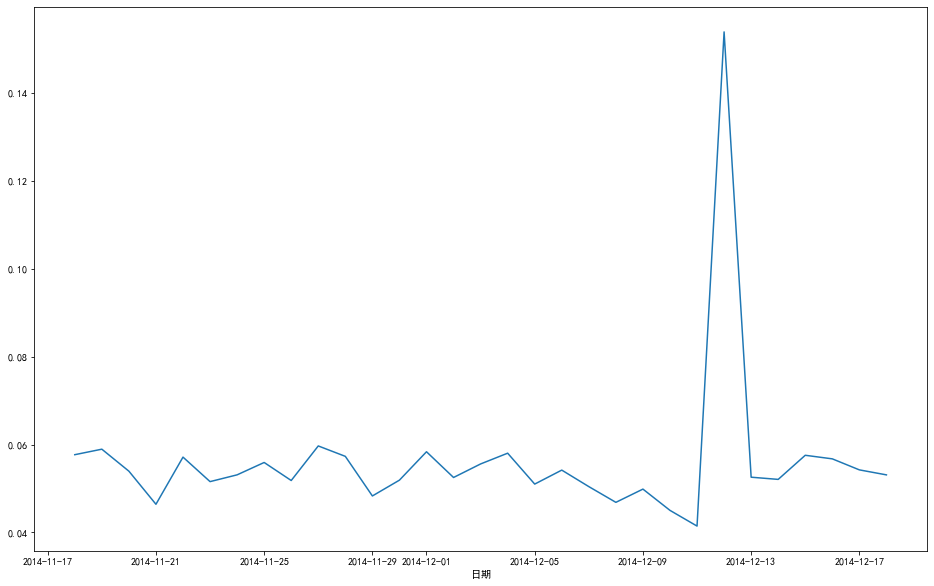

In [47]:
ARPU_day2 = ARPU_day.groupby('日期').apply(lambda x:x[x.行为==4]['操作次数'].sum()/len(x.用户名))

plt.figure(figsize=(16,10))
sns.lineplot(data=ARPU_day2)
plt.show()

复购率
复购率 = 服够行为用户数/消费行为用户总数

In [48]:
Re_buy = df[df.行为==4].groupby('用户名')['日期'].apply(lambda x:len(x.unique()))
print(round(Re_buy[Re_buy>=2].count()/Re_buy.count(),2))

0.47


建立RFM模型分析

In [49]:
from datetime import datetime

#Recency
datenow = datetime(2014,12,20)
Recency = df[df.行为==4].groupby('用户名')['日期'].apply(lambda x:datetime(2014,12,20)-x.sort_values().iloc[-1])
Recency = Recency.sort_values().reset_index().rename(columns={'日期':'R(时间差)'})
print(Recency)

#Frequency
Frequency = df[df.行为==4].groupby('用户名').日期.count().sort_values().reset_index().rename(columns={'日期':'F(消费频率)'})
print(Frequency)

            用户名  R(时间差)
0     110208146  2 days
1      63458915  2 days
2      78574430  2 days
3      14869973  2 days
4      88090767  2 days
...         ...     ...
4325    7761295 32 days
4326   52411237 32 days
4327   21226209 32 days
4328  104569658 32 days
4329  112711623 32 days

[4330 rows x 2 columns]
            用户名  F(消费频率)
0     142430177        1
1      69462679        1
2      69486826        1
3      69663083        1
4      69731330        1
...         ...      ...
4325   33448326       22
4326   56560718       33
4327   51492142       44
4328  123842164       49
4329  122338823       82

[4330 rows x 2 columns]


In [50]:
RFM = pd.merge(Recency,Frequency,on='用户名')

RFM.head(10)

,用户名,R(时间差),F(消费频率)
0,110208146,2 days,1
1,63458915,2 days,4
2,78574430,2 days,3
3,14869973,2 days,1
4,88090767,2 days,5
5,47237907,2 days,5
6,99796276,2 days,3
7,14759968,2 days,6
8,100042340,2 days,1
9,39744838,2 days,1


In [51]:
RFM['R(时间差)'] = RFM['R(时间差)'].astype('timedelta64[D]').astype(int)
RFM['R(时间差)'].head()

0    2
1    2
2    2
3    2
4    2
Name: R(时间差), dtype: int32

建立RFM模型

In [52]:
def Recency(day):
    if day < 5:
        return 5
    elif day >=5 & day < 10:
        return 4
    elif day >=10 & day < 15:
        return 3
    elif day >= 15 & day < 20:
        return 2
    elif day >= 20 & day <25:
        return 1
    elif day >= 25:
        return 0
    
    
def Frequency(time):
    if time < 15:
        return 0
    elif time >= 15 & time < 30:
        return 1
    elif time >= 30 & time <45:
        return 2
    elif time >= 45 & time < 60:
        return 3
    elif time >= 60 & time < 75:
        return 4
    elif time >= 75:
        return 5

In [53]:
RFM['R'] = RFM['R(时间差)'].apply(Recency)
RFM['F'] = RFM['F(消费频率)'].apply(Frequency)
RFM['RFM'] = RFM['R']+10 + RFM['F']
RFM.head(10)

,用户名,R(时间差),F(消费频率),R,F,RFM
0,110208146,2,1,5,0,15
1,63458915,2,4,5,0,15
2,78574430,2,3,5,0,15
3,14869973,2,1,5,0,15
4,88090767,2,5,5,0,15
5,47237907,2,5,5,0,15
6,99796276,2,3,5,0,15
7,14759968,2,6,5,0,15
8,100042340,2,1,5,0,15
9,39744838,2,1,5,0,15


In [54]:
RFM['RFM'] = RFM['RFM'].astype('str').astype(int)
RFM['RFM'].head()

0    15
1    15
2    15
3    15
4    15
Name: RFM, dtype: int32

In [55]:
def values(x):
    if x >= 55:
        return '重要价值客户'
    elif x >=44 & x < 55:
        return '重要潜力客户'
    elif x >= 22 & x < 44:
        return '重要唤回客户'
    else:
        return '流失客户'
RFM['用户等级'] = RFM['RFM'].apply(values)
RFM.sort_values(by='RFM',ascending=False)

,用户名,R(时间差),F(消费频率),R,F,RFM,用户等级
25,122338823,2,82,5,1,16,重要潜力客户
194,51492142,2,44,5,1,16,重要潜力客户
294,56560718,3,33,5,1,16,重要潜力客户
23,122421140,2,17,5,1,16,重要潜力客户
436,475826,3,16,5,1,16,重要潜力客户
...,...,...,...,...,...,...,...
1925,18728199,8,2,4,0,14,重要潜力客户
1926,81612967,8,2,4,0,14,重要潜力客户
1927,106873777,8,1,4,0,14,重要潜力客户
1928,73676533,8,1,4,0,14,重要潜力客户
